In [41]:
# importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing


In [42]:
df=pd.read_csv("Fraud_check.csv")
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [44]:
df.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [45]:
label_encoder = preprocessing.LabelEncoder()
df['Undergrad']=label_encoder.fit_transform(df['Undergrad'])

df['Urban']=label_encoder.fit_transform(df['Urban'])
df['Marital.Status']=label_encoder.fit_transform(df['Marital.Status'])

In [46]:
df = df.rename(columns={'Taxable.Income': 'Taxable_Income'})

In [47]:
x=df.iloc[:,0:5]
y=df['Taxable_Income']
x.head()

,Undergrad,Marital.Status,Taxable_Income,City.Population,Work.Experience
0,0,2,68833,50047,10
1,1,0,33700,134075,18
2,0,1,36925,160205,30
3,1,2,50190,193264,15
4,0,1,81002,27533,28


In [48]:
y.head()

0    68833
1    33700
2    36925
3    50190
4    81002
Name: Taxable_Income, dtype: int64

In [49]:
df['Taxable_Income'].unique()

array([68833, 33700, 36925, 50190, 81002, 33329, 83357, 62774, 83519,
       98152, 29732, 61063, 11794, 61830, 64070, 69869, 24987, 39476,
       97957, 10987, 88636, 14310, 78969, 92040, 38239, 31417, 55299,
       87778, 10379, 94033, 73854, 64007, 97200, 82071, 12514, 31336,
       10163, 68513, 14912, 74010, 50777, 49436, 96485, 70339, 33614,
       81079, 31532, 44034, 16264, 45706, 79616, 40137, 97703, 21917,
       81939, 19925, 34703, 78573, 10870, 65065, 94418, 26972, 91684,
       51685, 62158, 58312, 42507, 61486, 10150, 99619, 89302, 94287,
       41344, 41382, 32434, 61105, 67628, 31458, 73411, 10329, 44947,
       35610, 66564, 87348, 69098, 28449, 39277, 13747, 86652, 26741,
       77634, 99325, 85651, 15296, 10348, 41395, 22258, 79583, 22187,
       52495, 93078, 35072, 32662, 89250, 41641, 55873, 19169, 46629,
       51927, 69224, 24557, 77762, 96355, 90910, 21945, 79357, 42784,
       54638, 29944, 97318, 52022, 20391, 21016, 26679, 70682, 87326,
       15853, 75501,

In [50]:
df.Taxable_Income.value_counts()

59689    2
68833    1
60822    1
93090    1
79373    1
        ..
61906    1
31088    1
70365    1
56536    1
96519    1
Name: Taxable_Income, Length: 599, dtype: int64

In [51]:
colnames = list(df.columns)
colnames

['Undergrad',
 'Marital.Status',
 'Taxable_Income',
 'City.Population',
 'Work.Experience',
 'Urban']

In [52]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=40)

In [53]:
model = DecisionTreeClassifier(criterion = 'entropy', max_depth=4)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

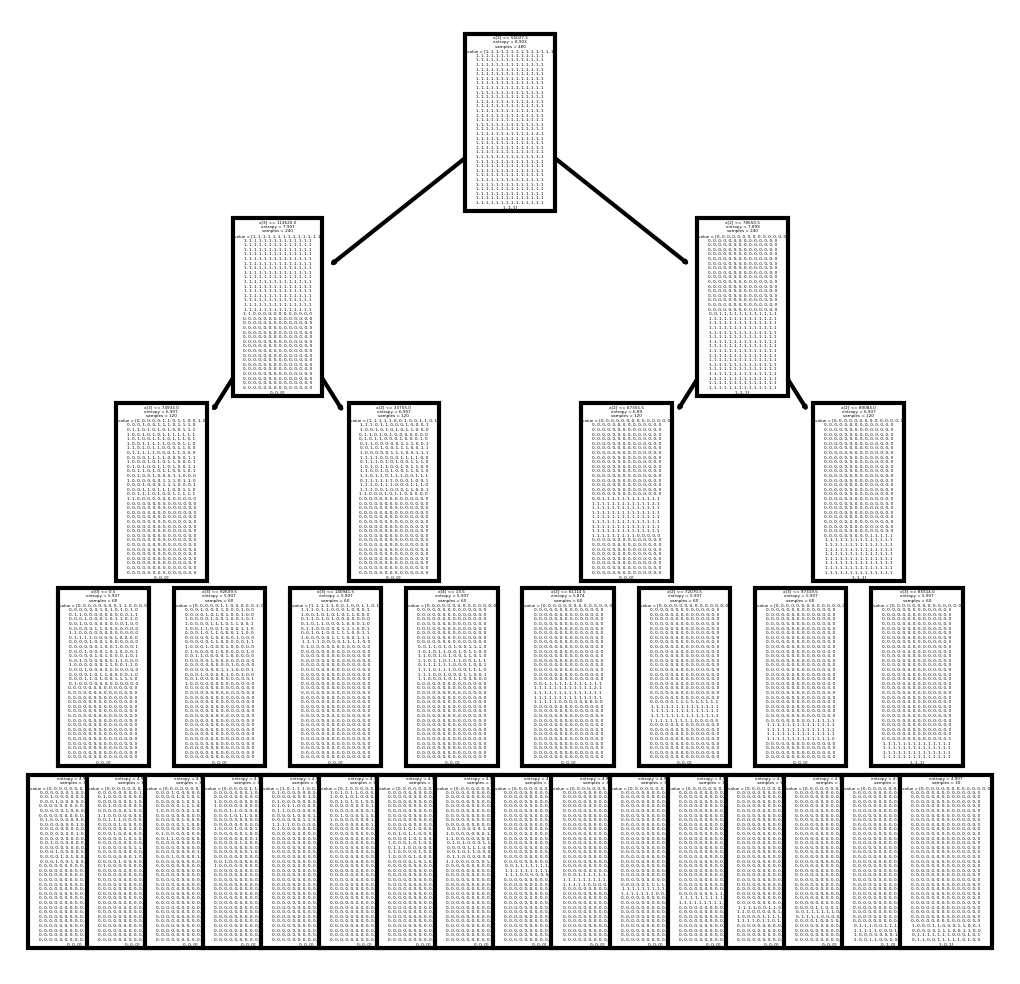

In [54]:
from sklearn import tree
fn=['Undergrad','Marital.Status','Taxable_Income','City.Population','Work.Experience','Urban']
cn=['Bad', 'Good']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4),dpi=300)
tree.plot_tree(model);

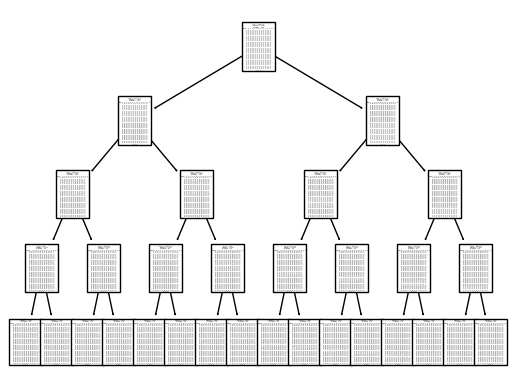

In [55]:
tree.plot_tree(model);


In [56]:
#preducting on test data
preds = model.predict(x_test)
pd.Series(preds).value_counts()

13068    12
89277    11
10150    11
67628    11
10900     9
89250     9
59689     9
61124     8
10163     7
78796     7
12470     6
33962     5
33810     5
10455     5
78728     3
72115     2
dtype: int64

In [57]:
pd.crosstab(y_test,preds)

col_0,10150,10163,10455,10900,12470,13068,33810,33962,59689,61124,67628,72115,78728,78796,89250,89277
Taxable_Income,,,,,,,,,,,,,,,,
10003,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
11794,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11804,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
12514,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12682,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96652,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
97957,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
98416,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [58]:
#Accuracy
np.mean(preds==y_test)


0.0

In [59]:
#building Decision  Tree Classifier(CART) using GINI Criteria
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [60]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [61]:
#prediction
pred=model.predict(x_test)
np.mean(preds==y_test)


0.0

In [62]:
#decision tree
from sklearn.tree import DecisionTreeRegressor

In [63]:
array = df.values
X = array[:,0:5]
Y= array[:,2]

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [65]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)


DecisionTreeRegressor()

In [66]:
#Find the accuracy
model.score(X_test,y_test)


0.9998751702895876